In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

In [2]:
data = pd.read_csv("googleplaystore.csv")
data.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      10841 non-null  int64  
 1   App             10841 non-null  object 
 2   Category        10841 non-null  object 
 3   Rating          9367 non-null   float64
 4   Reviews         10841 non-null  object 
 5   Size            10841 non-null  object 
 6   Installs        10841 non-null  object 
 7   Type            10840 non-null  object 
 8   Price           10841 non-null  object 
 9   Content Rating  10840 non-null  object 
 10  Genres          10841 non-null  object 
 11  Last Updated    10841 non-null  object 
 12  Current Ver     10833 non-null  object 
 13  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 1.2+ MB


In [4]:
# Unnamed diye isimlendirilmiş sütunu kaldıralım
df = data.drop("Unnamed: 0", axis=1)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [5]:
#değişken tiplerinde düzenleme yapalım
df['Reviews'] = df['Reviews'].astype(float)
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').astype(int)
df['Price'] = df['Price'].str.replace('$', '', regex=False).astype(float)
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

ValueError: could not convert string to float: '3.0M'

In [6]:
# veri setinde string tipindeki tek bir değer yüzünden int çevrilemiyordu onu düzeltelim
hatalı_satır= df[df['Reviews']=='3.0M']
hatalı_satır

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,11-Feb-18,1.0.19,4.0 and up,NaN


In [7]:
#bu veriyi incelediğim zaman verilerin kaydığını ve çok fazla eksiği olduğunu gördüm
#bu sebeple bu satırı silmeye karar veridm
df=df.drop(10472)
df=df.reset_index(drop=True)

In [8]:
df['Reviews'] = df['Reviews'].astype(int)
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').astype(int)
df['Price'] = df['Price'].str.replace('$', '', regex=False).astype(float)
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_27776\3673395239.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').astype(int)


In [9]:
#tekrarlanan değer var mı diye bakalım
df.duplicated().sum()

483

In [10]:
#tekrarlanan app leri ve tekrar sayısını öğrenelim 
tekrar_sayisi = df['App'].value_counts().sort_values(ascending=False)

for uygulama_adi, tekrar_sayisi in tekrar_sayisi.items():
    if tekrar_sayisi > 1:
        print(f"{uygulama_adi}: {tekrar_sayisi}")

ROBLOX: 9
CBS Sports App - Scores, News, Stats & Watch Live: 8
ESPN: 7
Duolingo: Learn Languages Free: 7
Candy Crush Saga: 7
8 Ball Pool: 7
Subway Surfers: 6
Sniper 3D Gun Shooter: Free Shooting Games - FPS: 6
Helix Jump: 6
Temple Run 2: 6
Nick: 6
Bowmasters: 6
Bleacher Report: sports news, scores, & highlights: 6
Zombie Catchers: 6
Bubble Shooter: 6
slither.io: 6
Calorie Counter - MyFitnessPal: 5
Wish - Shopping Made Fun: 5
Yahoo Fantasy Sports - #1 Rated Fantasy App: 5
eBay: Buy & Sell this Summer - Discover Deals Now!: 5
Plants vs. Zombies FREE: 5
Viber Messenger: 5
theScore: Live Sports Scores, News, Stats & Videos: 5
Farm Heroes Saga: 5
Netflix: 5
TripAdvisor Hotels Flights Restaurants Attractions: 5
Zombie Tsunami: 5
Flow Free: 5
Angry Birds Classic: 5
Granny: 5
Skyscanner: 5
MeetMe: Chat & Meet New People: 5
MLB At Bat: 5
BeautyPlus - Easy Photo Editor & Selfie Camera: 5
Snapchat: 4
Google Keep: 4
DRAGON BALL LEGENDS: 4
Minion Rush: Despicable Me Official Game: 4
Google Drive: 4

In [11]:
#tekrarlanan verileri kaldıralım
df.drop_duplicates(inplace=True)

In [12]:
#tekrar bakalım
df.duplicated().sum()

0

In [13]:
#boş verileri kontrol edelim
df.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

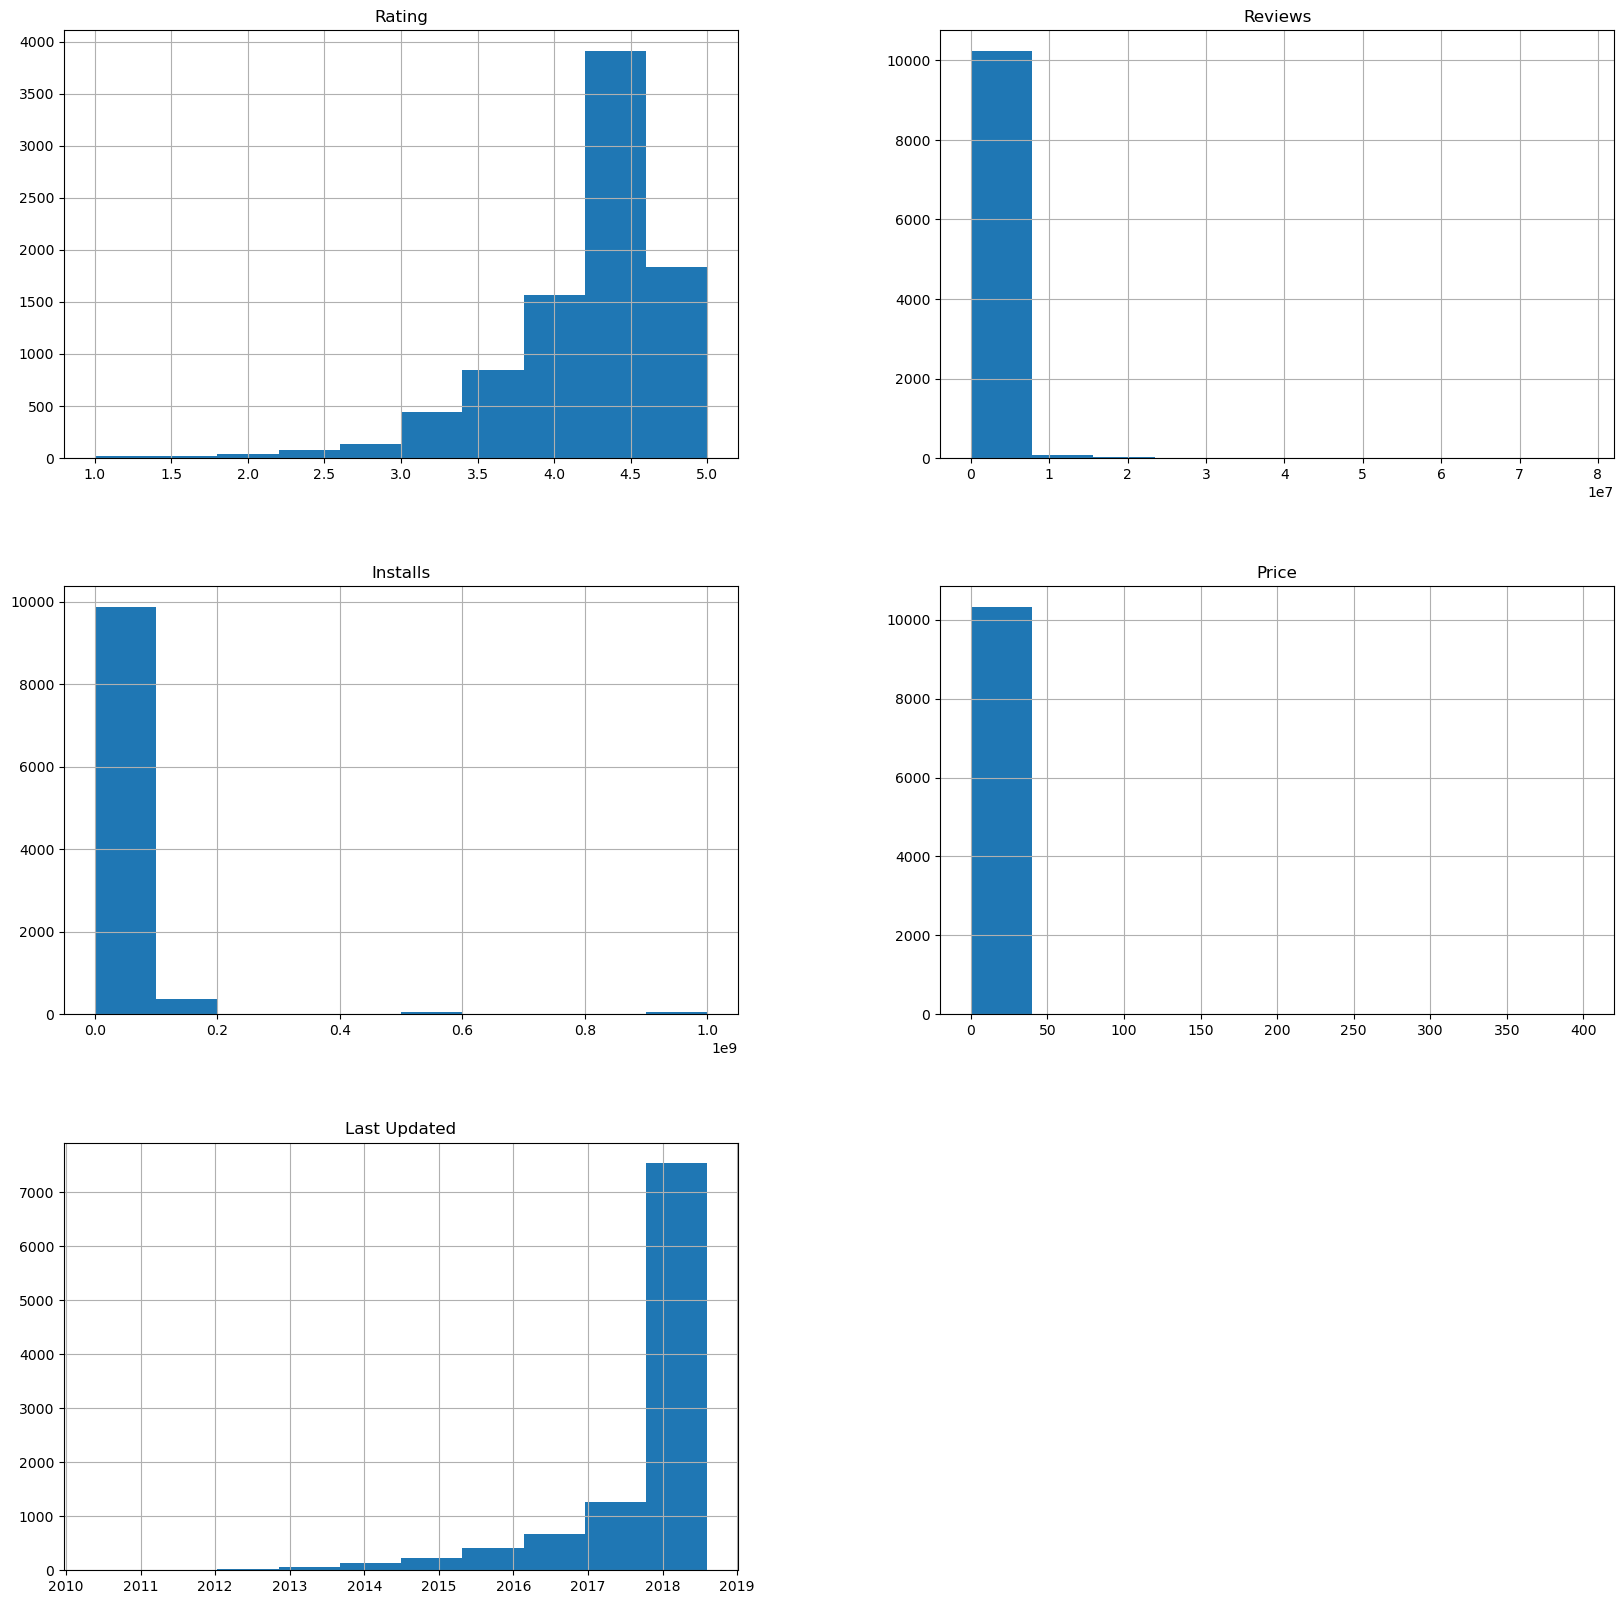

In [14]:
#histogram grafiği ile değişkenlerin dağılımlarını inceleyelim
df.hist(figsize=(20,20));

rating değişkeni sol çarpık durumda ve en çok boş değere sahip değişken olduğu için detaylıca incelemek istiyorum

In [15]:
#önce indirme sayılarına göre gruplandırıp ortalama rating değerlerine bakalım
indirme_aralıkları = pd.cut(df['Installs'], bins=[0, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000], labels=['0-99', '100-999', '1000-9999', '10000-99999', '100000-999999', '1000000-9999999', '10000000-99999999', '100000000-999999999'])
df['Indirme Aralıkları'] = indirme_aralıkları
ortalama_rating_değerleri = df.groupby('Indirme Aralıkları')['Rating'].mean()

print("İndirme Aralıklarına Göre Ortalama Rating:")
print(ortalama_rating_değerleri)

İndirme Aralıklarına Göre Ortalama Rating:
Indirme Aralıkları
0-99                   4.421136
100-999                4.089298
1000-9999              4.031095
10000-99999            4.094593
100000-999999          4.207043
1000000-9999999        4.285675
10000000-99999999      4.382995
100000000-999999999    4.309091
Name: Rating, dtype: float64


In [16]:
# Boş değerlerin indirme sayısına göre hangi aralıkta yoğunlaştığını görelim
rating_sütununda_boş_değerler = df[df['Rating'].isnull()].groupby('Indirme Aralıkları')['App'].count()

print("İndirme Aralıklarına Göre Var Olan Boş Değerlerin Sayısı:")
print(rating_sütununda_boş_değerler)

İndirme Aralıklarına Göre Var Olan Boş Değerlerin Sayısı:
Indirme Aralıkları
0-99                   1008
100-999                 321
1000-9999                87
10000-99999              31
100000-999999             3
1000000-9999999           0
10000000-99999999         0
100000000-999999999       0
Name: App, dtype: int64


0-100 arası indirmesi bulunan uygulamaların bu kadar fazla boş değer içirmesi beklenen bir durumdu. indirme aralıklarına göre görselleştirme yapıp net görelim.

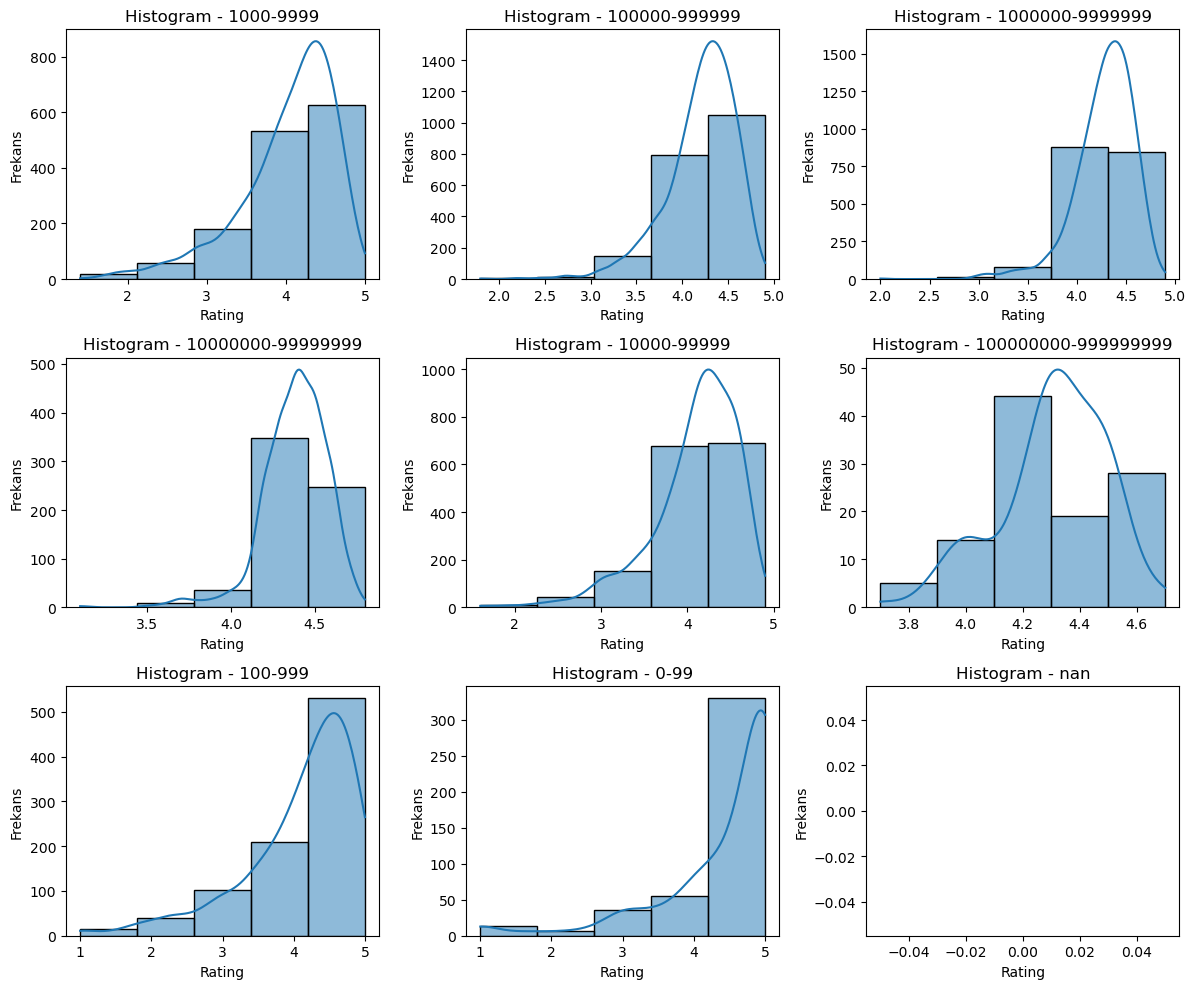

In [17]:
#görselleştirelim
plt.figure(figsize=(12, 10))

for i, indirme_grubu in enumerate(df['Indirme Aralıkları'].unique()):
    plt.subplot(3, 3, i+1)  # 2x4 alt grafiğe bölüyoruz, her bir indirme grubu için bir grafik
    sns.histplot(data=df[df['Indirme Aralıkları'] == indirme_grubu], x='Rating', bins=5, kde=True)
    plt.title(f'Histogram - {indirme_grubu}')
    plt.xlabel('Rating')
    plt.ylabel('Frekans')

plt.tight_layout()
plt.show()

In [18]:
#aralıkları kendi median değeri ile dolduralım
for indirme_grubu in df['Indirme Aralıkları'].unique():
    median_değeri = df[df['Indirme Aralıkları'] == indirme_grubu]['Rating'].median()
    df.loc[df['Indirme Aralıkları'] == indirme_grubu, 'Rating'] = df.loc[df['Indirme Aralıkları'] == indirme_grubu, 'Rating'].fillna(median_değeri)

In [19]:
# tekrar boş var mı diye bakalım
df.isnull().sum()

App                    0
Category               0
Rating                15
Reviews                0
Size                   0
Installs               0
Type                   1
Price                  0
Content Rating         0
Genres                 0
Last Updated           0
Current Ver            8
Android Ver            2
Indirme Aralıkları    15
dtype: int64

In [20]:
# rating sütununda hala daha boş değer var tekrar bakalım
boş_ratingler = df[df['Rating'].isnull()]
boş_ratingler

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Indirme Aralıkları
4465,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5.5M,0,Paid,1.49,Everyone,Personalization,2018-07-11,1.1,4.2 and up,NaN
5307,Ak Parti Yardım Toplama,SOCIAL,NaN,0,8.7M,0,Paid,13.99,Teen,Social,2017-07-28,3.4.4.3.3,4.1 and up,NaN
5486,AP Series Solution Pro,FAMILY,NaN,0,7.4M,0,Paid,1.99,Everyone,Education,2017-07-30,1.3,4.0 and up,NaN
5945,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,33M,0,Paid,2.99,Everyone,Education,2016-04-15,1,3.0 and up,NaN
6692,cronometra-br,PRODUCTIVITY,NaN,0,5.4M,0,Paid,154.99,Everyone,Productivity,2017-11-24,1.0.0,4.1 and up,NaN
7434,Pekalongan CJ,SOCIAL,NaN,0,5.9M,0,Free,0.00,Teen,Social,2018-07-21,0.0.1,4.4 and up,NaN
8081,CX Network,BUSINESS,NaN,0,10M,0,Free,0.00,Everyone,Business,2018-08-06,1.3.1,4.1 and up,NaN
8614,Sweden Newspapers,NEWS_AND_MAGAZINES,NaN,0,2.1M,0,Free,0.00,Everyone,News & Magazines,2018-07-07,1.1,4.4 and up,NaN
8871,Test Application DT 02,ART_AND_DESIGN,NaN,0,1.2M,0,Free,0.00,Everyone,Art & Design,2017-03-14,4,4.2 and up,NaN
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0.00,Everyone 10+,Strategy,2018-06-28,Varies with device,Varies with device,NaN


In [21]:
# 0 indirmeye sahip olan uygulamalara 0 rating değerini verelim
df.loc[boş_ratingler.index, 'Rating'] = 0

In [22]:
#Type değişkenini de dolduralım
boş_type = df[df['Type'].isnull()]
boş_type

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Indirme Aralıkları
9148,Command & Conquer: Rivals,FAMILY,0.0,0,Varies with device,0,NaN,0.0,Everyone 10+,Strategy,2018-06-28,Varies with device,Varies with device,NaN


In [23]:
df.loc[boş_type.index, 'Type'] = 'Free'

In [24]:
# veri setimde işime yaramayacak olan sütunları kaldırıp devam etmek istiyorum
df = df.drop(['Current Ver', 'Android Ver', 'Indirme Aralıkları'], axis=1)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20
...,...,...,...,...,...,...,...,...,...,...,...
10835,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0.0,Everyone,Education,2017-07-25
10836,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0.0,Everyone,Education,2018-07-06
10837,Parkinson Exercices FR,MEDICAL,4.3,3,9.5M,1000,Free,0.0,Everyone,Medical,2017-01-20
10838,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19


In [25]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
dtype: int64

In [26]:
# özet istatistiklere bakalım
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,10357.0,4.245032e+00,5.415506e-01,0.0,4.1,4.3,4.6,5.000000e+00
Reviews,10357.0,4.059046e+05,2.696778e+06,0.0,32.0,1680.0,46416.0,7.815831e+07
Installs,10357.0,1.415776e+07,8.023955e+07,0.0,1000.0,100000.0,1000000.0,1.000000e+09
Price,10357.0,1.030800e+00,1.627863e+01,0.0,0.0,0.0,0.0,4.000000e+02


Bu istatistiklere dayanarak şu yorumlarda bulunabiliriz:

Rating:
Ortalama rating puanı 4.25, yani uygulamalar genellikle iyi puan almış.
Minimum puan 0.0, maksimum puan ise 5.0.
Rating puanlarının çoğu 4.1 ile 4.6 arasında bulunuyor (25% ile 75% aralığı).
Standart sapma 0.54, bu da puanların genelde ortalamaya yakın bir değerde toplandığını gösterir.

Reviews:
Ortalama inceleme sayısı 405,904, ancak standart sapma oldukça yüksek. 
Minimum inceleme sayısı 0, maksimum ise 78,158,310.

Installs:
Ortalama indirme sayısı 14,157,760, ancak bu değer de standart sapma oldukça yüksek (80,239,550).
Minimum indirme sayısı 0 ve maksimum 1,000,000,000.

Price:
Ortalama fiyat 1.03.
Çoğu uygulamanın fiyatı 0, yüzde 25 ile yüzde 75 arasında kalan çoğu uygulama ücretsizdir.
Maximum fiyat 400.

Uygulamalar genellikle iyi puan almış gibi görünüyor, ancak inceleme ve indirme sayılarında büyük bir varyasyon var. Bu durum, uygulamalar arasında büyük başarı farklılıkları olduğunu ve bazı uygulamaların popülerlik kazanırken diğerlerinin daha az dikkat çektiğini gösterir. Fiyatlar genellikle düşük, çoğu ücretsiz ve yüksek fiyatlı uygulamaların sayısı azdır.

In [27]:
#tekrar veri setimizi inceleyip görselleştirmelere geçelim
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20
...,...,...,...,...,...,...,...,...,...,...,...
10835,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0.0,Everyone,Education,2017-07-25
10836,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0.0,Everyone,Education,2018-07-06
10837,Parkinson Exercices FR,MEDICAL,4.3,3,9.5M,1000,Free,0.0,Everyone,Medical,2017-01-20
10838,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19


In [28]:
# index i yenileyelim
df.reset_index(drop=True, inplace=True)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20
...,...,...,...,...,...,...,...,...,...,...,...
10352,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0.0,Everyone,Education,2017-07-25
10353,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0.0,Everyone,Education,2018-07-06
10354,Parkinson Exercices FR,MEDICAL,4.3,3,9.5M,1000,Free,0.0,Everyone,Medical,2017-01-20
10355,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19


In [29]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [30]:
# Her kategorinin uygulama sayısını hesaplayalım
kategori_sayilari = df['Category'].value_counts().reset_index()
kategori_sayilari.columns = ['Category', 'Count']

# Her kategori için farklı bir renk paleti kullanalım (örneğin, viridis)
renkler = sns.color_palette("viridis", n_colors=len(kategori_sayilari))

# Treemap'i oluşturalım
plt.figure(figsize=(40, 15))
squarify.plot(
    sizes=kategori_sayilari['Count'],
    label=kategori_sayilari.apply(lambda x: f"{x['Category']} ({x['Count']})", axis=1),  # Etiketleri ekleyelim
    color=renkler,
    alpha=0.7,
    text_kwargs={'fontsize': 12, 'fontweight': 'bold'}  # Etiketlerin görüntüsünü özelleştirelim
)

plt.axis('off')
plt.title('Uygulamaların Kategori Dağılımı')
plt.show()

NameError: name 'squarify' is not defined

<Figure size 4000x1500 with 0 Axes>

Family, Game ve Tools kategorileri en çok içeriğe sahip olan kategoriler olarak gözüküyor.

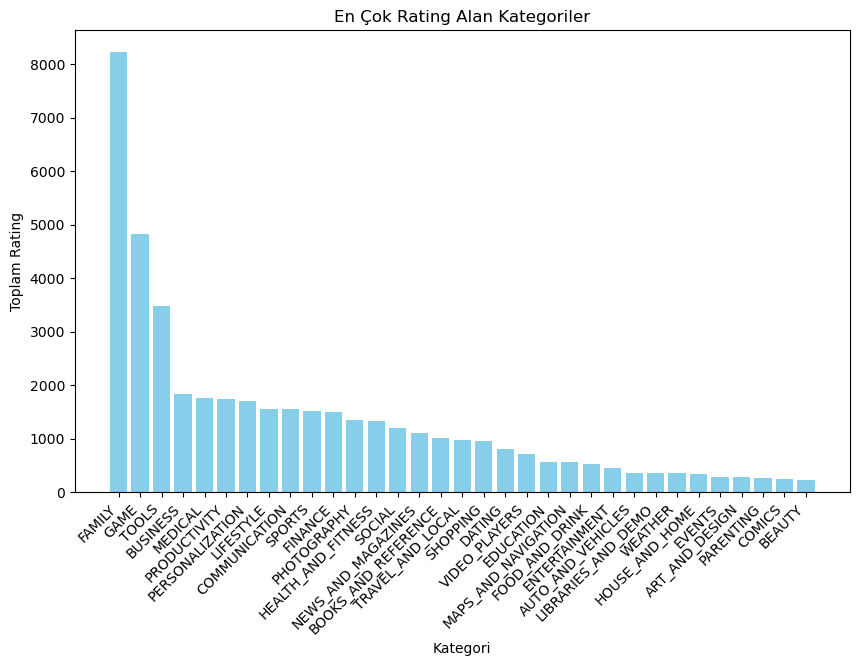

In [31]:
# en çok rating alan kategorilere bakalım
# Kategori bazında toplam rating değerlerini hesaplayalım
kategori_rating = df.groupby('Category')['Rating'].sum().reset_index()

# Rating'e göre DataFrame'i sıralayalım
kategori_rating = kategori_rating.sort_values(by='Rating', ascending=False)

# Çubuk grafiğini oluşturalım
plt.figure(figsize=(10, 6))
plt.bar(kategori_rating['Category'], kategori_rating['Rating'], color='skyblue')
plt.xlabel('Kategori')
plt.ylabel('Toplam Rating')
plt.title('En Çok Rating Alan Kategoriler')
plt.xticks(rotation=45, ha='right')  # Kategori isimlerini 45 derece sağa döndürelim
plt.show()

Productıvıty kategori sıralamasında önünde olan medical ve busıness 'dan daha fazla beğeni almış. Yine Famıly, Game ve Tools en çok beğeniyi alan kategori olmuş.

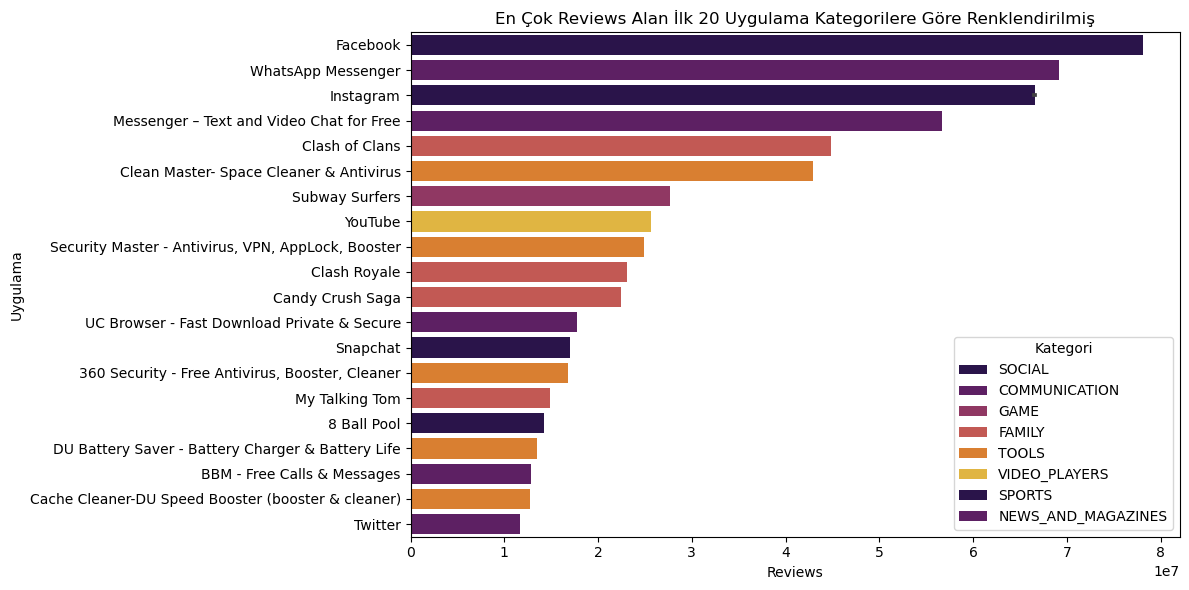

In [32]:
# Reviews sütununa göre en çok değere sahip ilk 20 uygulamayı bulalım
reviews_top20 = df.nlargest(53, 'Reviews')

# Kategori bazında renk paletini oluşturalım
renkler = sns.color_palette("inferno")

# Çubuk grafiğini oluşturalım
plt.figure(figsize=(12, 6))
sns.barplot(x='Reviews', y='App', hue='Category', data=reviews_top20, palette=renkler, dodge=False)
plt.xlabel('Reviews')
plt.ylabel('Uygulama')
plt.title('En Çok Reviews Alan İlk 20 Uygulama Kategorilere Göre Renklendirilmiş')
plt.legend(title='Kategori')
plt.tight_layout()  # Grafik boyutunu düzeltmek için
plt.show()

En çok reviews alan uygulamalar social kategorisinde bulunmakta. 

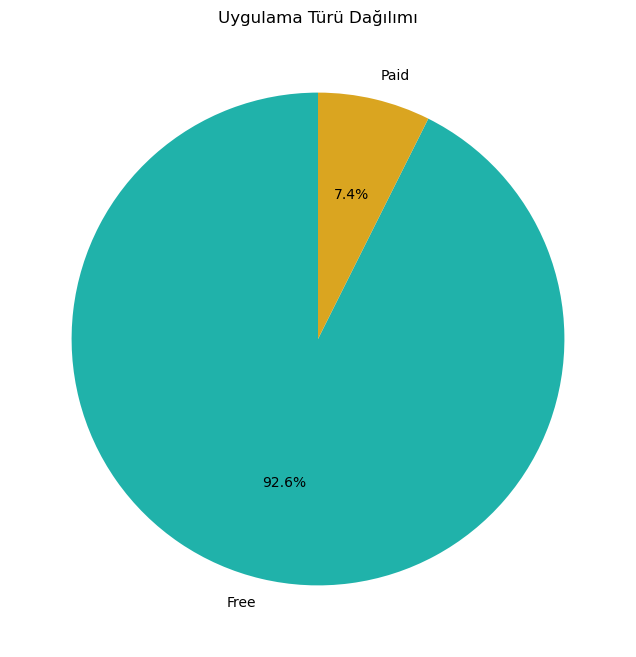

In [33]:
# Type sütununa göre verileri gruplayalım
type_counts = df['Type'].value_counts()

# Pasta grafiğini oluşturalım
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightseagreen', 'goldenrod'])
plt.title('Uygulama Türü Dağılımı')
plt.show()

Uygulamaların %92.6 sı ücretsizken %7.4 ü ücretlidir.

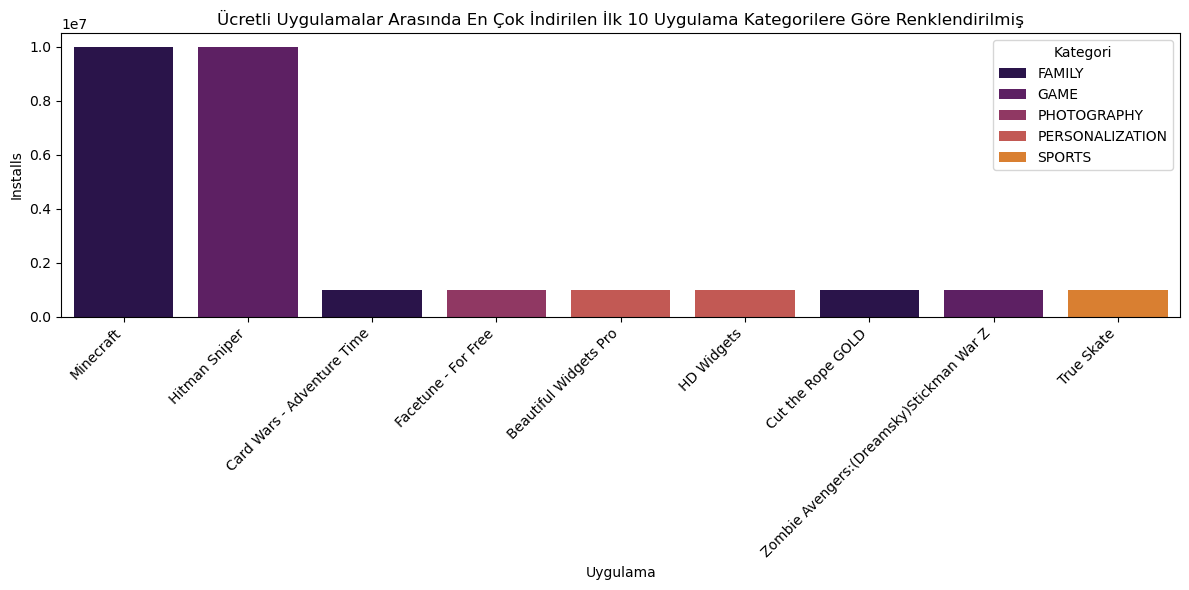

In [34]:
# Ücretli uygulamaları filtreleyelim
paid_apps = df[df['Type'] == 'Paid']
# Ücretli uygulamalar arasında en çok indirilen ilk 10 uygulamayı bulalım
paid_top10 = paid_apps.nlargest(10, 'Installs')

# Kategori bazında renk paletini oluşturalım (inferno paleti)
renkler = sns.color_palette("inferno")

# Çubuk grafiğini oluşturalım
plt.figure(figsize=(12, 6))
sns.barplot(x='App', y='Installs', hue='Category', data=paid_top10, palette=renkler, dodge=False)
plt.xlabel('Uygulama')
plt.ylabel('Installs')
plt.title('Ücretli Uygulamalar Arasında En Çok İndirilen İlk 10 Uygulama Kategorilere Göre Renklendirilmiş')
plt.xticks(rotation=45, ha='right')  # Uygulama isimlerini yatay olarak yazdırmak için
plt.legend(title='Kategori')
plt.tight_layout()  # Grafik boyutunu düzeltmek için
plt.show()